<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/PCA_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


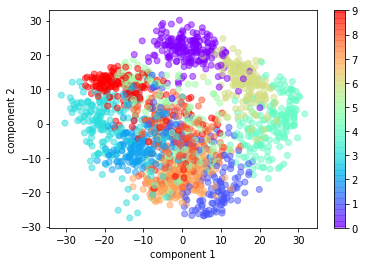

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, alpha=0.5,cmap='rainbow')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Text(0, 0.5, 'cumulative explained variance')

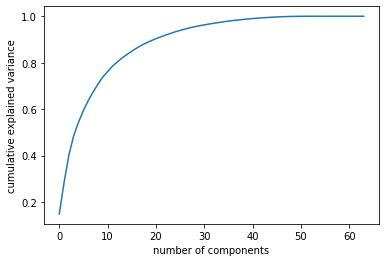

In [ ]:
import numpy as np

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))#cumulative sum
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#graph shows till 30 more than 90% of information is there, 3 will give a better picture of the features affecting

In [ ]:
pca=PCA(35).fit_transform(digits.data)

To remove noise we can use the components with high variance,Autoencoders more effective than pca

In [ ]:
digits.data.shape

(1797, 64)

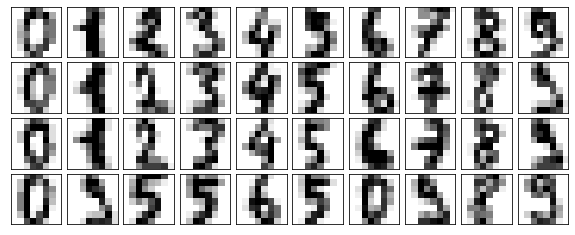

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest')
plot_digits(digits.data)

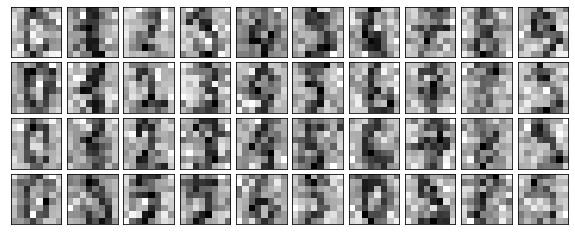

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
pca = PCA(0.50).fit(noisy)#how many components are having 50% of the variance=12 principalcomponents as in above graphplot 
#Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits

In [ ]:
pca.n_components_

12

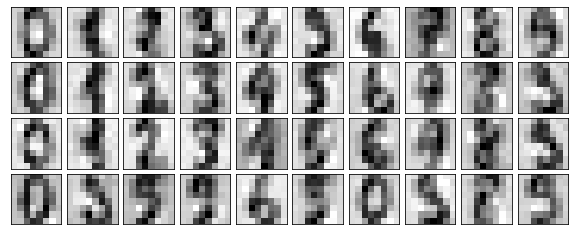

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)